In [2]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"E:\Python\ML\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.drop('CustomerID', axis = 1, inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

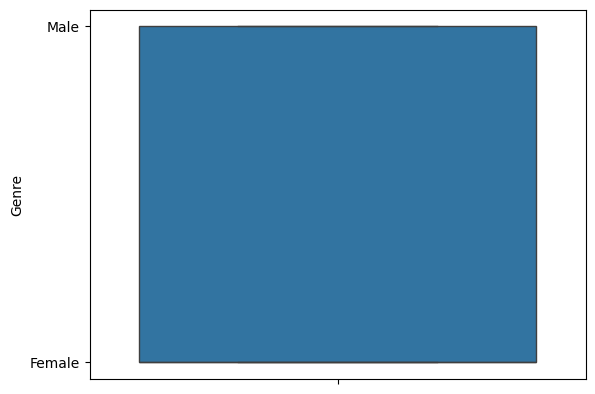

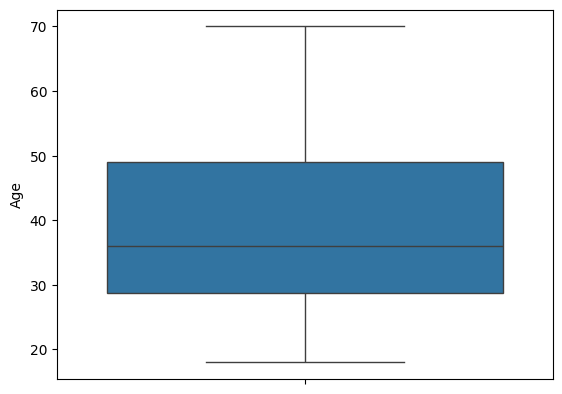

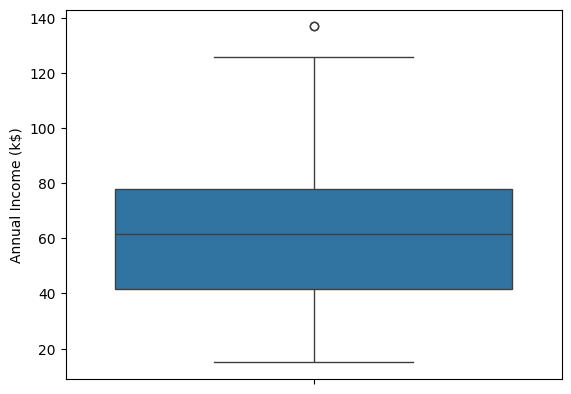

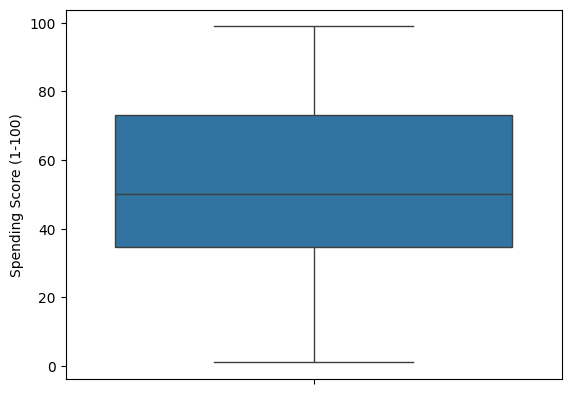

In [11]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

<Axes: >

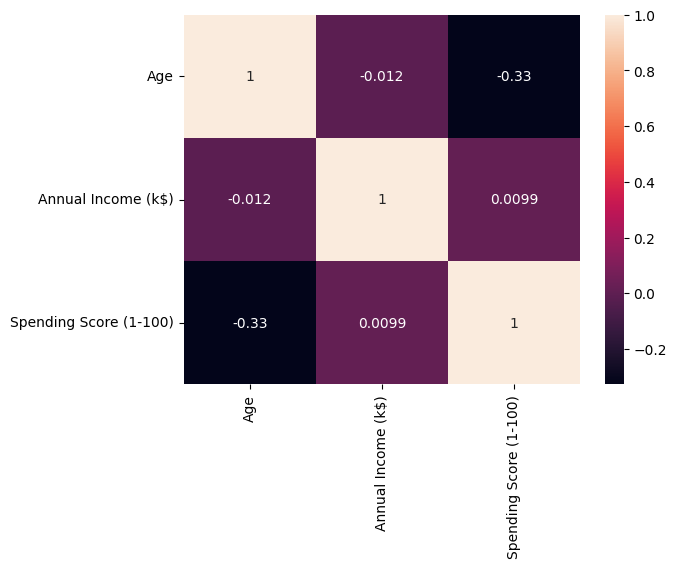

In [12]:
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

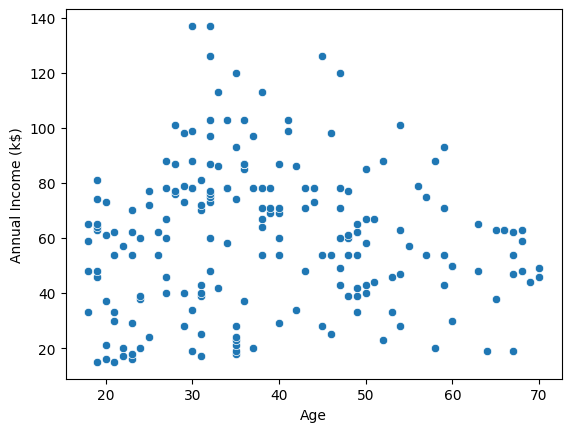

In [13]:
sns.scatterplot(x=df['Age'], y= df['Annual Income (k$)'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[['Annual Income (k$)']])
# df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
# scaler.fit(df[['Age']])
# df['Age'] = scaler.transform(df[['Age']])

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
y_predicted= km.fit_predict(df[['Age','Spending Score (1-100)']])
y_predicted

array([2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 2, 0, 3, 0, 2, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 2,
       3, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       2, 0, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [17]:
df['clusters']= y_predicted

In [18]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,0.019231,15,0.387755,2
1,Male,0.057692,15,0.816327,0
2,Female,0.038462,16,0.051020,2
3,Female,0.096154,16,0.775510,0
4,Female,0.250000,17,0.397959,2


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

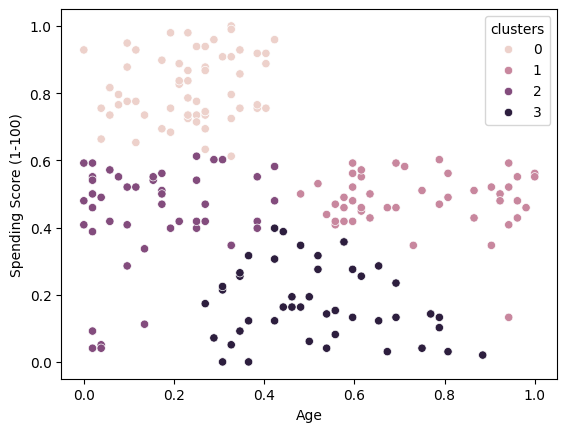

In [19]:
sns.scatterplot(x=df['Age'], y= df['Spending Score (1-100)'], hue = df['clusters'])

In [20]:
wcss = []
k_rng = range(1,10)
for i in range(1,10):
    k = KMeans(n_clusters=i)
    k.fit(df[['Age','Spending Score (1-100)']])
    wcss.append(k.inertia_)

Text(0, 0.5, 'wcss')

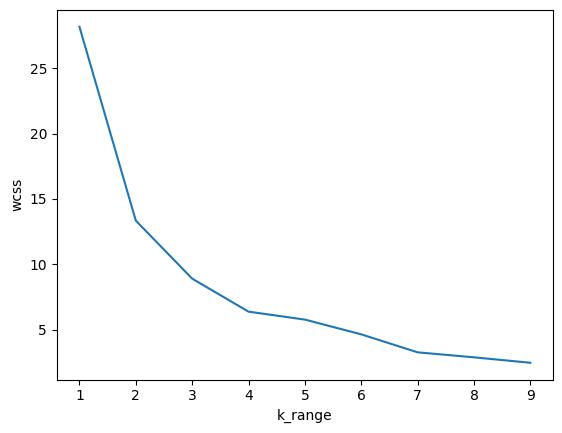

In [21]:
plt.plot(k_rng,wcss)
plt.xlabel('k_range')
plt.ylabel('wcss')